<a href="https://colab.research.google.com/github/Vakicherla-Sudheethi/Food_saftey_Prediction_Project/blob/main/project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [ ]:

food_data=pd.read_csv('/food_data.csv')
len(food_data)


7083

In [ ]:
food_data.head()

food_data.dtypes

food_data.describe()


,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Carbohydrate,Data.Cholesterol,Data.Fiber,Data.Protein,Data.Water,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Vitamins.Vitamin B12
count,7.083000e+03,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000
mean,4.884965e+07,43.759283,20.828039,34.458845,1.703840,8.599085,59.798820,27.791473,133.088945,217.127488,0.705177
std,2.425159e+07,259.520139,21.887363,77.479105,2.558168,8.296889,26.828203,38.207886,126.498700,204.812523,2.502821
min,1.100000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.715077e+07,0.000000,5.650000,0.000000,0.100000,2.220000,45.895000,12.000000,48.000000,111.000000,0.000000
50%,5.326020e+07,0.000000,13.300000,8.000000,1.000000,6.190000,66.590000,20.000000,102.000000,183.000000,0.180000
75%,6.720345e+07,1.000000,26.195000,46.000000,2.100000,12.130000,80.605000,29.000000,189.000000,270.500000,0.550000
max,9.999821e+07,4655.000000,100.000000,3074.000000,46.200000,78.130000,99.980000,611.000000,1429.000000,6040.000000,82.440000


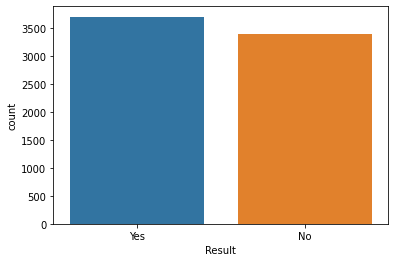

In [ ]:
sns.countplot(x='Result',data=food_data)

In [ ]:
food_data.isna().sum()

Category                          0
Description                       0
Nutrient Data Bank Number         0
Data.Alpha Carotene               0
Data.Carbohydrate                 0
Data.Cholesterol                  0
Data.Fiber                        0
Data.Protein                      0
Data.Water                        0
Data.Major Minerals.Magnesium     0
Data.Major Minerals.Phosphorus    0
Data.Major Minerals.Potassium     0
Data.Vitamins.Vitamin B12         0
Result                            0
dtype: int64

In [ ]:
food_data.drop(['Category','Description','Nutrient Data Bank Number'],axis=1,inplace=True)



In [ ]:


food_data.head()


,Data.Alpha Carotene,Data.Carbohydrate,Data.Cholesterol,Data.Fiber,Data.Protein,Data.Water,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Vitamins.Vitamin B12,Result
0,0,6.89,14,0.0,1.03,87.50,3,14,51,0.05,Yes
1,0,4.87,8,0.0,3.34,89.04,12,103,157,0.56,No
2,0,4.67,12,0.0,3.28,88.10,12,101,150,0.54,Yes
3,0,4.46,14,0.0,3.10,88.20,5,86,253,0.36,Yes
4,0,4.67,12,0.0,3.28,88.10,12,101,150,0.54,Yes


In [ ]:

x=food_data[['Data.Alpha Carotene','Data.Carbohydrate','Data.Cholesterol','Data.Fiber','Data.Protein','Data.Water','Data.Major Minerals.Magnesium','Data.Major Minerals.Phosphorus','Data.Major Minerals.Potassium','Data.Vitamins.Vitamin B12']]
y=food_data['Result']


In [ ]:
from sklearn.model_selection import train_test_split

#train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)



In [ ]:
from sklearn.linear_model import LogisticRegression

#Fit  Logistic Regression 

lr=LogisticRegression()

lr.fit(x_train,y_train)


LogisticRegression()

In [ ]:
predict=lr.predict(x_test)


#print confusion matrix 

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])


,Predicted No,Predicted Yes
Actual No,135,934
Actual Yes,172,1097


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predict))

input_data=(1,0,2,23.44,34,21,0,19,19,10)

#chnage the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)


              precision    recall  f1-score   support

          No       0.44      0.13      0.20      1069
         Yes       0.54      0.86      0.66      1269

    accuracy                           0.53      2338
   macro avg       0.49      0.50      0.43      2338
weighted avg       0.49      0.53      0.45      2338



In [ ]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=lr.predict(input_data_reshaped)
print(prediction)



['Yes']


In [ ]:

import pickle
file=open("model.pkl", 'wb')
pickle.dump(lr, file)
